In [8]:
import os
import dotenv
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as pltgr

dotenv.load_dotenv()
path_csv = os.getenv("CSV_SEGURIDAD")
try:
    df= pd.read_csv(path_csv,sep=",",encoding="utf-8")
    print("Datos de seguridad ciudadana (INE) cargados")
    display(df.head())
except Exception as e:
        print(f"error :{e}")

Datos de seguridad ciudadana (INE) cargados


,rph_ID,idhogar,enc_region,enc_rpc,P_AUMENTO_COM,P_INSEG_LUGARES_14,SCREEN_INT_RDV,SCREEN_INT_RFV,SCREEN_INT_RVI,SCREEN_ROB_HUR
0,00-00-33-94_1,00-00-33-94-H1,10,10101,1.0,3.0,NaN,2.0,2.0,2.0
1,00-00-33-94_2,00-00-33-94-H1,10,10101,NaN,NaN,NaN,NaN,NaN,NaN
2,00-00-33-94_3,00-00-33-94-H1,10,10101,NaN,NaN,NaN,NaN,NaN,NaN
3,00-00-33-94_4,00-00-33-94-H1,10,10101,NaN,NaN,NaN,NaN,NaN,NaN
4,00-00-41-76_1,00-00-41-76-H1,10,10202,NaN,NaN,NaN,NaN,NaN,NaN


Index(['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna',
       'codregion', 'st_area_sh', 'st_length_', 'Region', 'Comuna',
       'Provincia', 'geometry'],
      dtype='object')


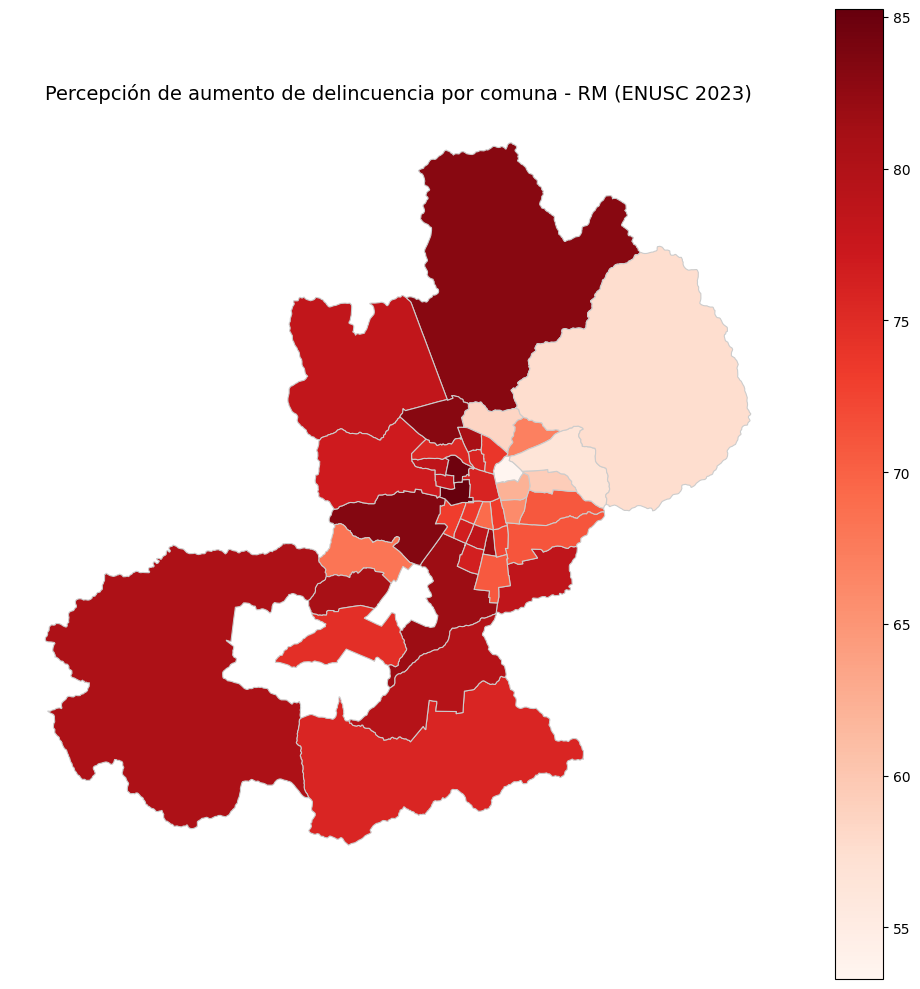

In [ ]:
gdf_comunas = gpd.read_file('/home/tole/PrograCientifica/analisisOfertasLab/scripts/data/geo/13.geojson')
print(gdf_comunas.columns)

df['P_AUMENTO_COM'] = df['P_AUMENTO_COM'].fillna(0)
df_filtrado_comunas = df[df['P_AUMENTO_COM'].isin([1, 2, 3])]

inseguridad = (df_filtrado_comunas.groupby('enc_rpc')['P_AUMENTO_COM']
    .apply(lambda x: (x == 1).mean() * 100)
    .reset_index(name='perc_aumento')
)

gdf_comunas['enc_rpc'] = gdf_comunas['cod_comuna'].astype(int)
gdf_mapa = gdf_comunas.merge(inseguridad, on='enc_rpc', how='left')

fig, ax = pltgr.subplots(figsize=(10, 10))
gdf_mapa.plot(
    column='perc_aumento',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True,
    missing_kwds={
        "color": "white",  # relleno blanco
        "edgecolor": "gray",  # borde gris claro
        "hatch": "///",  # patrón opcional
        "label": "Sin datos"
    }
)

ax.set_title('Percepción de aumento de delincuencia por comuna - RM (ENUSC 2023)', fontsize=14)
ax.axis('off')
pltgr.tight_layout()
pltgr.show()

In [2]:
def clasificar_region(region):
    if region == 1:
        return 'Tarapacá'
    elif region == 2:
        return 'Antofagasta'
    elif region == 3:
        return 'Atacama'
    elif region == 4:
        return 'Coquimbo'
    elif region == 5:
        return 'Valparaiso'
    elif region == 6:
        return "O'higgins"
    elif region == 7:
        return 'Maule'
    elif region == 8:
        return 'Biobío'
    elif region == 9:
        return 'La Araucanía'
    elif region == 10:
        return 'Los Lagos'
    elif region == 11:
        return 'Aysén'
    elif region == 12:
        return 'Magallanes'
    elif region == 13:
        return 'Metropolitana'
    elif region == 14:
        return 'Los Ríos'
    elif region == 15:
        return 'Arica y Parinacota'
    elif region == 16:
        return 'Ñuble'
    else:
        return 'Otros'

# Clasificar comunas
def clasificar_comuna(comuna):
    if comuna == 1101:
        return 'Iquique'
    elif comuna == 1107:
        return 'Alto Hospicio'
    elif comuna == 1401:
        return 'Pozo Almonte'
    elif comuna == 2101:
        return 'Antofagasta'
    elif comuna == 2201:
        return 'Calama'
    elif comuna == 2301:
        return 'Tocopilla'
    elif comuna == 3101:
        return 'Copiapó'
    elif comuna == 3201:
        return 'Chañaral'
    elif comuna == 3301:
        return 'Vallenar'
    elif comuna == 4101:
        return 'La Serena'
    elif comuna == 4102:
        return 'Coquimbo'
    elif comuna == 4201:
        return 'Illapel'
    elif comuna == 4203:
        return 'Los Vilos'
    elif comuna == 4301:
        return 'Ovalle'
    elif comuna == 5101:
        return 'Valparaíso'
    elif comuna == 5103:
        return 'Concón'
    elif comuna == 5109:
        return 'Viña del Mar'
    elif comuna == 5301:
        return 'Los Andes'
    elif comuna == 5401:
        return 'La Ligua'
    elif comuna == 5501:
        return 'Quillota'
    elif comuna == 5502:
        return 'Calera'
    elif comuna == 5601:
        return 'San Antonio'
    elif comuna == 5701:
        return 'San Felipe'
    elif comuna == 5801:
        return 'Quilpué'
    elif comuna == 5802:
        return 'Limache'
    elif comuna == 5804:
        return 'Villa Alemana'
    elif comuna == 6101:
        return 'Rancagua'
    elif comuna == 6105:
        return 'Doñihue'
    elif comuna == 6106:
        return 'Graneros'
    elif comuna == 6108:
        return 'Machalí'
    elif comuna == 6110:
        return 'Mostazal'
    elif comuna == 6115:
        return 'Rengo'
    elif comuna == 6117:
        return 'San Vicente'
    elif comuna == 6201:
        return 'Pichilemu'
    elif comuna == 6301:
        return 'San Fernando'
    elif comuna == 6303:
        return 'Chimbarongo'
    elif comuna == 6310:
        return 'Santa Cruz'
    elif comuna == 7101:
        return 'Talca'
    elif comuna == 7102:
        return 'Constitución'
    elif comuna == 7105:
        return 'Maule'
    elif comuna == 7201:
        return 'Cauquenes'
    elif comuna == 7301:
        return 'Curicó'
    elif comuna == 7304:
        return 'Molina'
    elif comuna == 7401:
        return 'Linares'
    elif comuna == 7404:
        return 'Parral'
    elif comuna == 7406:
        return 'San Javier'
    elif comuna == 8101:
        return 'Concepción'
    elif comuna == 8102:
        return 'Coronel'
    elif comuna == 8103:
        return 'Chiguayante'
    elif comuna == 8106:
        return 'Lota'
    elif comuna == 8107:
        return 'Penco'
    elif comuna == 8108:
        return 'San Pedro de la Paz'
    elif comuna == 8110:
        return 'Talcahuano'
    elif comuna == 8111:
        return 'Tomé'
    elif comuna == 8112:
        return 'Hualpén'
    elif comuna == 8201:
        return 'Lebu'
    elif comuna == 8301:
        return 'Los Ángeles'
    elif comuna == 9101:
        return 'Temuco'
    elif comuna == 9108:
        return 'Lautaro'
    elif comuna == 9109:
        return 'Loncoche'
    elif comuna == 9111:
        return 'Nueva Imperial'
    elif comuna == 9112:
        return 'Padre Las Casas'
    elif comuna == 9114:
        return 'Pitrufquén'
    elif comuna == 9115:
        return 'Pucón'
    elif comuna == 9119:
        return 'Vilcún'
    elif comuna == 9120:
        return 'Villarrica'
    elif comuna == 9201:
        return 'Angol'
    elif comuna == 9202:
        return 'Collipulli'
    elif comuna == 9211:
        return 'Victoria'
    elif comuna == 10101:
        return 'Puerto Montt'
    elif comuna == 10102:
        return 'Calbuco'
    elif comuna == 10109:
        return 'Puerto Varas'
    elif comuna == 10201:
        return 'Castro'
    elif comuna == 10202:
        return 'Ancud'
    elif comuna == 10208:
        return 'Quellón'
    elif comuna == 10301:
        return 'Osorno'
    elif comuna == 11101:
        return 'Coihaique'
    elif comuna == 11201:
        return 'Aisén'
    elif comuna == 12101:
        return 'Punta Arenas'
    elif comuna == 12401:
        return 'Natales'
    elif comuna == 13101:
        return 'Santiago'
    elif comuna == 13102:
        return 'Cerrillos'
    elif comuna == 13103:
        return 'Cerro Navia'
    elif comuna == 13104:
        return 'Conchalí'
    elif comuna == 13105:
        return 'El Bosque'
    elif comuna == 13106:
        return 'Estación Central'
    elif comuna == 13107:
        return 'Huechuraba'
    elif comuna == 13108:
        return 'Independencia'
    elif comuna == 13109:
        return 'La Cisterna'
    elif comuna == 13110:
        return 'La Florida'
    elif comuna == 13111:
        return 'La Granja'
    elif comuna == 13112:
        return 'La Pintana'
    elif comuna == 13113:
        return 'La Reina'
    elif comuna == 13114:
        return 'Las Condes'
    elif comuna == 13115:
        return 'Lo Barnechea'
    elif comuna == 13116:
        return 'Lo Espejo'
    elif comuna == 13117:
        return 'Lo Prado'
    elif comuna == 13118:
        return 'Macul'
    elif comuna == 13119:
        return 'Maipú'
    elif comuna == 13120:
        return 'Ñuñoa'
    elif comuna == 13121:
        return 'Pedro Aguirre Cerda'
    elif comuna == 13122:
        return 'Peñalolén'
    elif comuna == 13123:
        return 'Providencia'
    elif comuna == 13124:
        return 'Pudahuel'
    elif comuna == 13125:
        return 'Quilicura'
    elif comuna == 13126:
        return 'Quinta Normal'
    elif comuna == 13127:
        return 'Recoleta'
    elif comuna == 13128:
        return 'Renca'
    elif comuna == 13129:
        return 'San Joaquín'
    elif comuna == 13130:
        return 'San Miguel'
    elif comuna == 13131:
        return 'San Ramon'
    elif comuna == 13132:
        return 'Vitacura'
    elif comuna == 13201:
        return 'Puente Alto'
    elif comuna == 13301:
        return 'Colina'
    elif comuna == 13302:
        return 'Lampa'
    elif comuna == 13401:
        return 'San Bernardo'
    elif comuna == 13402:
        return 'Buin'
    elif comuna == 13404:
        return 'Paine'
    elif comuna == 13501:
        return 'Melipilla'
    elif comuna == 13601:
        return 'Talagante'
    elif comuna == 13604:
        return 'Padre Hurtado'
    elif comuna == 13605:
        return 'Peñaflor'
    elif comuna == 14101:
        return 'Valdivia'
    elif comuna == 14107:
        return 'Paillaco'
    elif comuna == 14108:
        return 'Panguipulli'
    elif comuna == 14201:
        return 'La Unión'
    elif comuna == 14204:
        return 'Río Bueno'
    elif comuna == 15101:
        return 'Arica'
    elif comuna == 16101:
        return 'Chillán'
    elif comuna == 16102:
        return 'Bulnes'
    elif comuna == 16103:
        return 'Chillán Viejo'
    elif comuna == 16107:
        return 'Quillón'
    elif comuna == 16109:
        return 'Yungay'
    elif comuna == 16201:
        return 'Quirihue'
    elif comuna == 16301:
        return 'San Carlos'
    elif comuna == 16302:
        return 'Coihueco'
    else:
        return 'Otros'

df['enc_rpc'] = df['enc_rpc'].apply(clasificar_comuna)
    
df['enc_region'] = df['enc_region'].apply(clasificar_region)
tabla_regiones = df['enc_region'].value_counts().reset_index()
tabla_regiones = tabla_regiones.sort_values(by='enc_region', ascending=True)
tabla_regiones.columns = ['Region', 'Cantidad']
print("Cantidad de encuestas por region\n")

print(print(tabla_regiones.to_string(index=False)))

Cantidad de encuestas por region

            Region  Cantidad
       Antofagasta      4812
Arica y Parinacota      4186
           Atacama      3076
             Aysén      2529
            Biobío     13663
          Coquimbo      5955
      La Araucanía      7438
         Los Lagos      5936
          Los Ríos      4353
        Magallanes      3684
             Maule     11644
     Metropolitana     43609
         O'higgins      8720
          Tarapacá      5112
        Valparaiso     15780
             Ñuble      5797
None


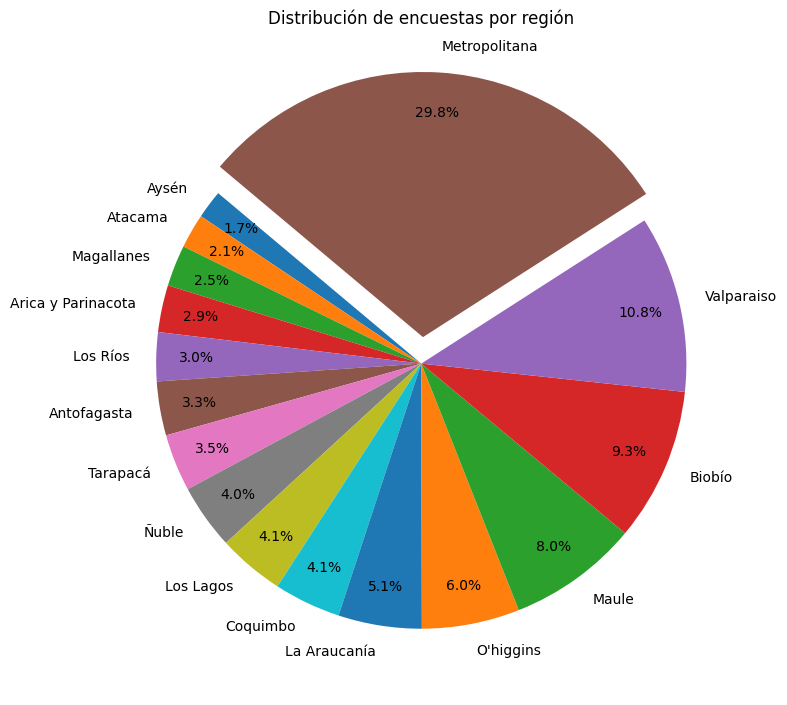

In [3]:
tabla_regiones = tabla_regiones.sort_values(by='Cantidad', ascending=True)
labels = tabla_regiones['Region']
sizes = tabla_regiones['Cantidad']

# Explode la categoría más grande (opcional)
explode = [0.1 if s == max(sizes) else 0 for s in sizes]

pltgr.figure(figsize=(8, 8))
pltgr.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    pctdistance=0.85,
    labeldistance=1.1
)
pltgr.title('Distribución de encuestas por región')
pltgr.tight_layout()
pltgr.show()

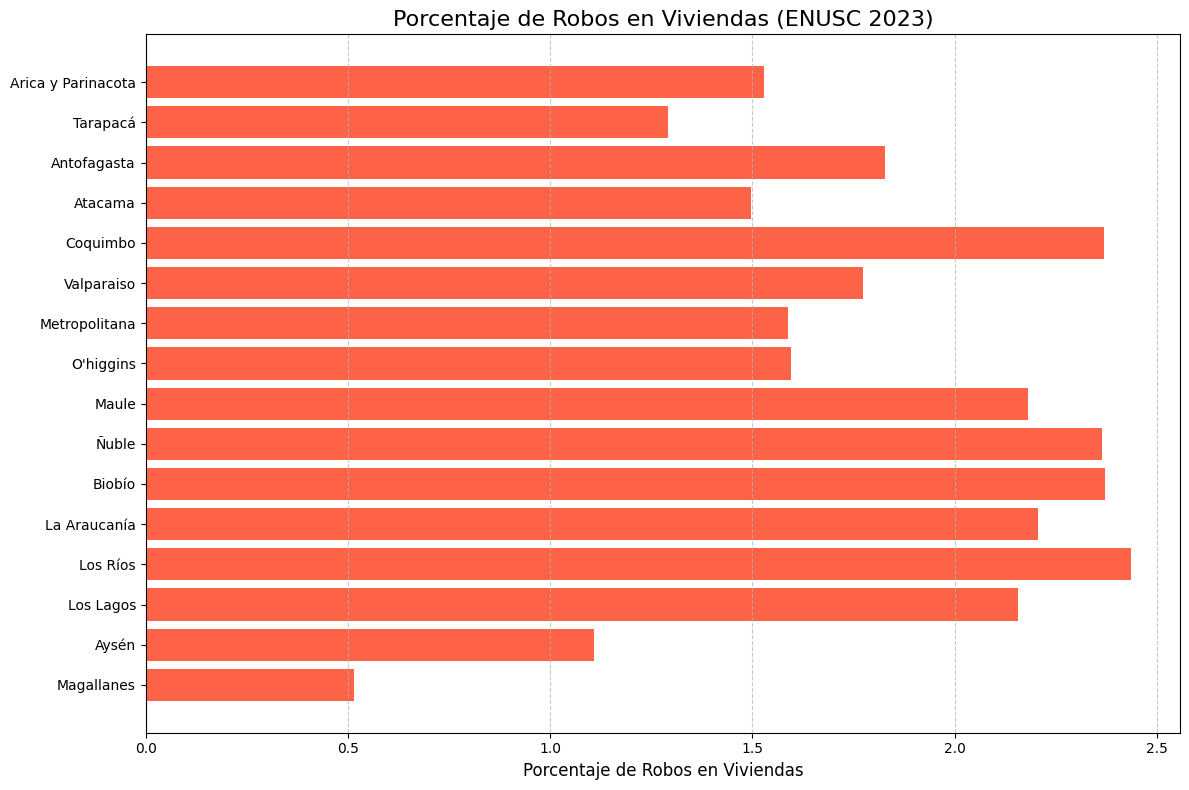

In [4]:
# Calcular el total de encuestados por región
total_por_region = df['enc_region'].value_counts().sort_index()

# Filtrar los datos de robos en viviendas
df_filtrado = df[df['SCREEN_INT_RFV'] == 1]
conteo_robos_por_region = df_filtrado['enc_region'].value_counts().sort_index()

# Calcular el porcentaje de robos en viviendas respecto al total de encuestados
porcentaje_robos = (conteo_robos_por_region / total_por_region * 100).fillna(0)

# Convertir a DataFrame para graficar
porcentaje_robos_df = porcentaje_robos.reset_index()
porcentaje_robos_df.columns = ['Region', 'Porcentaje']

# Definir el orden de las regiones de norte a sur
orden_regiones = [
    'Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo',
    'Valparaiso', 'Metropolitana', "O'higgins", 'Maule', 'Ñuble', 'Biobío', 'La Araucanía',
    'Los Ríos', 'Los Lagos', 'Aysén', 'Magallanes'
]

# Aplicar el orden personalizado al DataFrame
porcentaje_robos_df['Region'] = pd.Categorical(
    porcentaje_robos_df['Region'], categories=orden_regiones, ordered=True
)

# Ordenar el DataFrame según el orden de las regiones
porcentaje_robos_df = porcentaje_robos_df.sort_values('Region')


# Configuración del gráfico
pltgr.figure(figsize=(12, 8))
pltgr.barh(porcentaje_robos_df['Region'], porcentaje_robos_df['Porcentaje'], color='tomato')
pltgr.title('Porcentaje de Robos en Viviendas (ENUSC 2023)', fontsize=16)
pltgr.xlabel('Porcentaje de Robos en Viviendas', fontsize=12)
pltgr.gca().invert_yaxis()  # Región con mayor porcentaje arriba
pltgr.grid(axis='x', linestyle='--', alpha=0.7)
pltgr.tight_layout()
pltgr.show()

enc_rpc
 851
1975
 745
 625
2567
4186
 700
 534
1412
 576
 976
 702
1063
 904
 779
 490
1053
1655
 870
 727
1678
 429
 905
 480
1818
1617
 958
1078
1767
1315
1314
1994
 551
 643
 885
 555
1106
 627
 904
 571
2515
 714
1318
 959
 807
 648
 904
1819
1020
1226
1018
 549
 849
 911
1286
 657
1193
 709
 489
1089
 767
1004
1076
1111
1138
1688
1207
 912
 988
 536
1077
 474
1270
1150
1055
 682
 544
1052
 481
 705
1098
1607
1087
1028
 435
 431
 622
1077
 410
 889
1789
1459
 678
2607
 506
 930
1040
 447
1983
1455
 478
1597
1473
 994
 857
 588
 727
1250
 858
1307
1002
 937
 604
1254
1418
1386
 737
 612
2101
 946
2386
1364
1896
 833
1054
1720
 819
1897
 462
 398
1756
 542
 441
2329
 526
 985


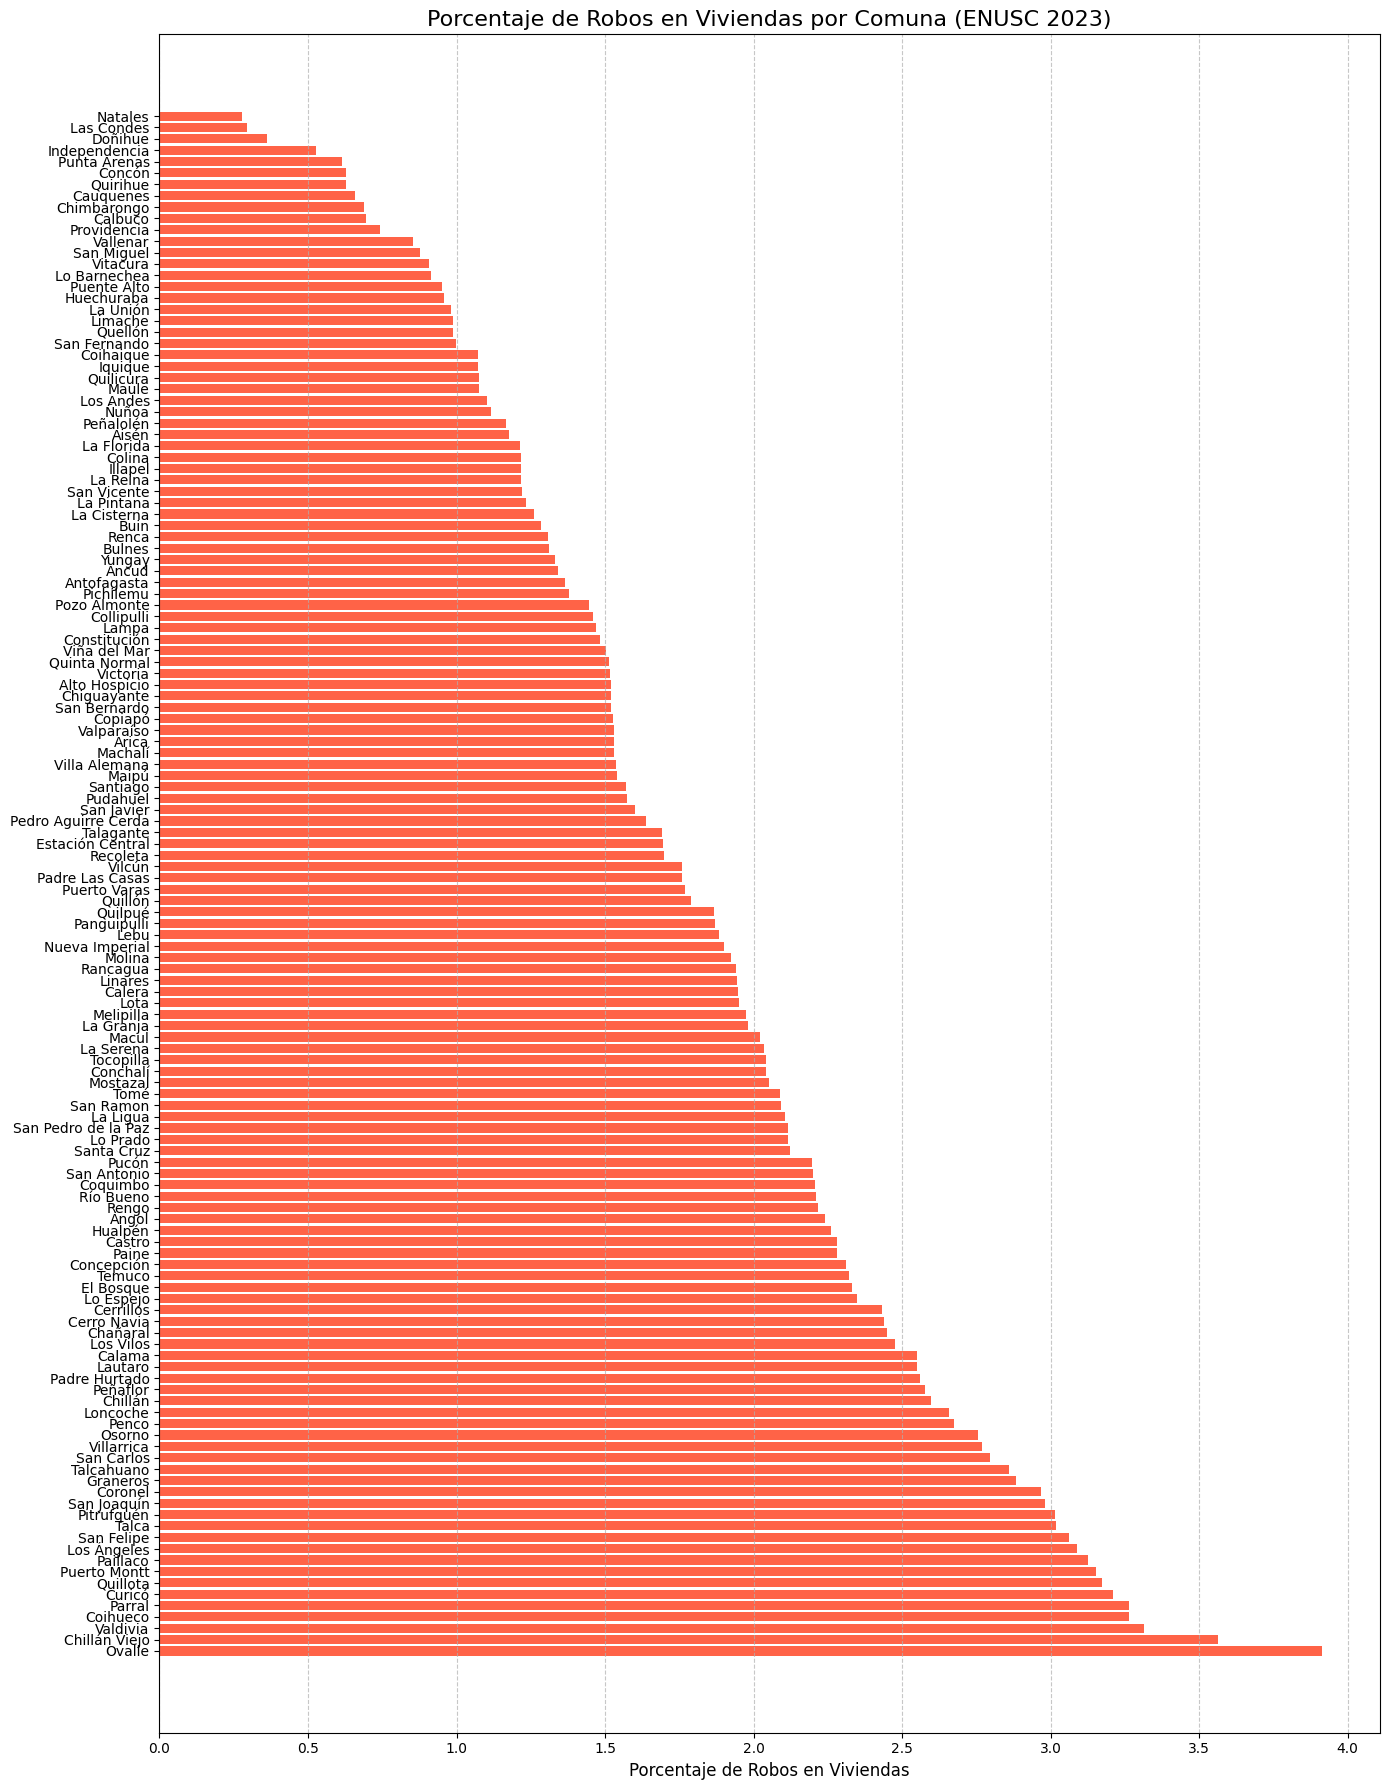

In [5]:
# Calcular el total de encuestados por región
total_por_comuna = df['enc_rpc'].value_counts().sort_index()

print(total_por_comuna.to_string(index=False))
# Filtrar los datos de robos en viviendas
df_filtrado = df[df['SCREEN_INT_RFV'] == 1]
conteo_robos_por_comuna = df_filtrado['enc_rpc'].value_counts().sort_index()

# Calcular el porcentaje de robos en viviendas respecto al total de encuestados
porcentaje_robos = (conteo_robos_por_comuna / total_por_comuna * 100).fillna(0)

# Convertir a DataFrame para graficar
porcentaje_robos_df = porcentaje_robos.reset_index()
porcentaje_robos_df.columns = ['Comuna', 'Porcentaje']


# Ordenar el DataFrame según el orden de las regiones
porcentaje_robos_df = porcentaje_robos_df.sort_values('Porcentaje')


# Configuración del gráfico
pltgr.figure(figsize=(14, 18))  # Aumenta el tamaño del gráfico para más espacio
pltgr.barh(
    porcentaje_robos_df['Comuna'], 
    porcentaje_robos_df['Porcentaje'], 
    color='tomato', 
    height=0.8  # Aumenta el grosor de las barras
)
pltgr.title('Porcentaje de Robos en Viviendas por Comuna (ENUSC 2023)', fontsize=16)
pltgr.xlabel('Porcentaje de Robos en Viviendas', fontsize=12)
pltgr.gca().invert_yaxis()  # Región con menor porcentaje arriba
pltgr.grid(axis='x', linestyle='--', alpha=0.7)
pltgr.tight_layout()
pltgr.show()

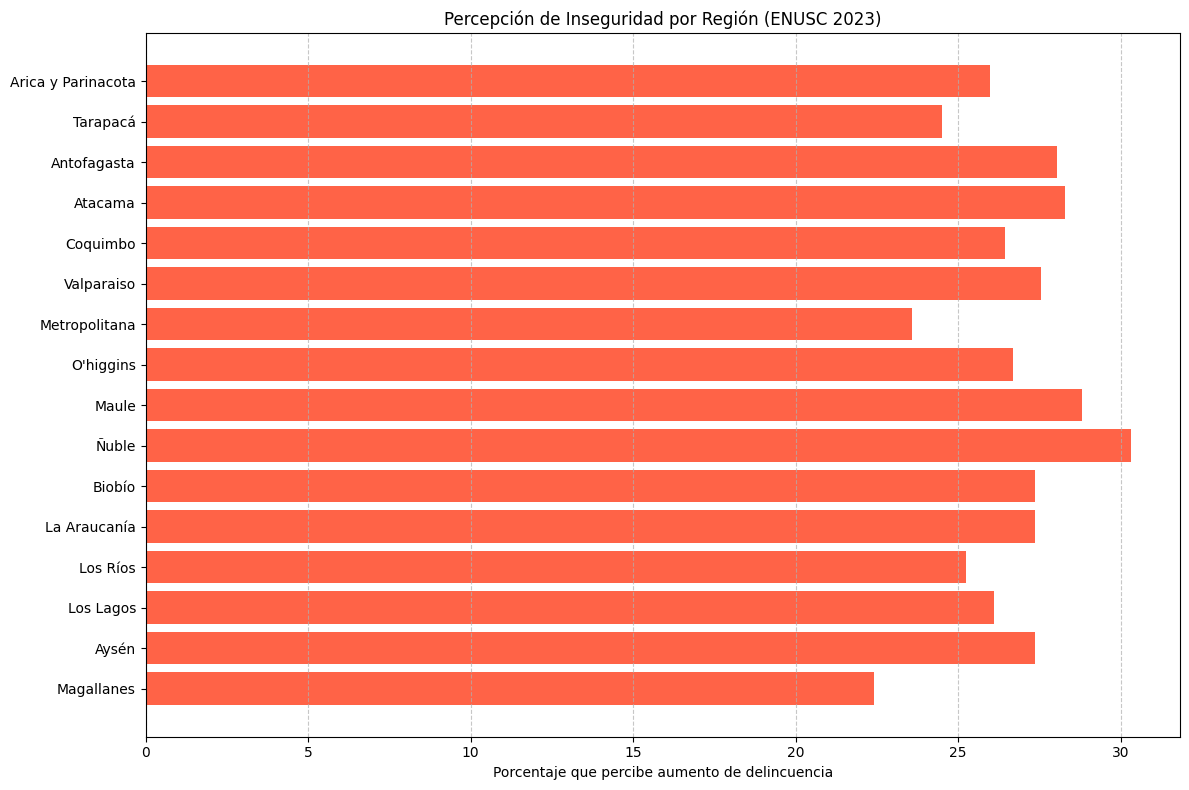

In [6]:
# Verificar si la columna 'P_AUMENTO_COM' existe
if 'P_AUMENTO_COM' not in df.columns:
    print("Error: La columna 'P_AUMENTO_COM' no existe en el DataFrame.")
else:
    # Crear tabla de porcentaje de "Aumentó" por región
    inseguridad_por_region = (
        df.groupby('enc_region')['P_AUMENTO_COM']
        .apply(lambda x: (x == 1).mean() * 100)  # porcentaje de personas que dijeron "aumentó"
        .reset_index(name='Porcentaje_Aumento')
    )
    inseguridad_por_region.columns = ['Region', 'Porcentaje']

    # Definir el orden de las regiones de norte a sur
    orden_regiones = [
        'Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 'Coquimbo',
        'Valparaiso', 'Metropolitana', "O'higgins", 'Maule', 'Ñuble', 'Biobío', 'La Araucanía',
        'Los Ríos', 'Los Lagos', 'Aysén', 'Magallanes'
    ]

    # Aplicar el orden personalizado al DataFrame
    inseguridad_por_region['Region'] = pd.Categorical(
        inseguridad_por_region['Region'], categories=orden_regiones, ordered=True
    )

    # Ordenar el DataFrame según el orden de las regiones
    inseguridad_por_region = inseguridad_por_region.sort_values('Region')

    # Graficar HOLA
    pltgr.figure(figsize=(12, 8))
    pltgr.barh(inseguridad_por_region['Region'], inseguridad_por_region['Porcentaje'], color='tomato')
    pltgr.xlabel('Porcentaje que percibe aumento de delincuencia')
    pltgr.title('Percepción de Inseguridad por Región (ENUSC 2023)')
    pltgr.gca().invert_yaxis()  # Región con mayor porcentaje arriba
    pltgr.grid(axis='x', linestyle='--', alpha=0.7)
    pltgr.tight_layout()
    pltgr.show()